In [1]:
#  In this problem we need to identify the digit in given images. We have total 70,000 images, 
#out of which 49,000 are part of train images with the label of digit and rest 21,000 images 
# are unlabeled (known as test images). Now, We need to identify the digit for test images. 
#Public and Private split for test images are 40:60 and evaluation metric of this challenge is accuracy. 

#About Data:

#The data set used for this problem is from the populat MNIST data set. 
# Developed by Yann LeCun, Corina Cortes and Christopher Burger for evaluating machine learning model
# on the handwritten digit classification problem. It is a widely used data set in the machine learning 
# community. For more details about the data set, read here http://bit.ly/1REjJgL

In [2]:
# All the images are 28X28 size and are in .png format 

In [3]:
%pylab inline
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras

Populating the interactive namespace from numpy and matplotlib


/home/sidhraj/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [4]:
## Getting the warning: RuntimeWarning: compiletime version 3.5 of module 
#'tensorflow.python.framework.fast_tensor_util' does not match
# runtime version 3.6
# To supress the warning :
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [5]:
# For reproducing the results, setting the seed
seed = 34
rng = np.random.RandomState(seed)

In [6]:
# Setting up the directories: for data, submission

root_dir = os.path.abspath('/home/sidhraj/Documents/AV/Identify Digits/')
data_dir = os.path.join(root_dir, 'Data')
sub_dir = os.path.join(root_dir, 'Submission')

# check for existence of the directories
os.path.exists(root_dir)
os.path.exists(data_dir)
os.path.exists(sub_dir)

True

In [7]:
## Loading the files

In [8]:
train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))
sample_submission = pd.read_csv(os.path.join(data_dir, 'Sample_Submission.csv'))

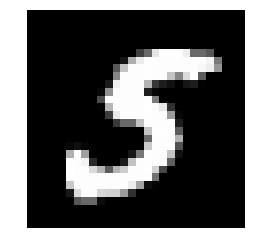

In [9]:
# Just to check how the image looks:

img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir, 'train', img_name)
img = imread(filepath, flatten=True)
pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [10]:
img
# internal representation of the above image as numpy array

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.

In [11]:
## Converting the test and train images to numpy array

In [12]:
train_numpy = []
for i in train.filename:  # filename is the ID column in csv file  train
    image_path = os.path.join(data_dir, 'train', i) ## train is the folder containing images
    image = imread(image_path, flatten=True) ## to remove color from images flatten=True
    image = image.astype('float32')
    train_numpy.append(image)
    
train_x = np.stack(train_numpy)
train_x /= 255.0
train_x = train_x.reshape(-1, 784).astype('float32')


test_numpy = []
for i in test.filename:
    image_path = os.path.join(data_dir, 'test', i)
    image = imread(image_path, flatten=True)
    image = image.astype('float32')
    test_numpy.append(image)
    
test_x = np.stack(test_numpy)
test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

In [12]:
# creating the train and validation set

split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train.label.values[:split_size], train.label.values[split_size:]

In [13]:
train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [14]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]
train.label.iloc[split_size:]

34300    3
34301    1
34302    6
34303    8
34304    3
34305    8
34306    8
34307    9
34308    3
34309    8
34310    4
34311    6
34312    6
34313    3
34314    6
34315    7
34316    5
34317    3
34318    0
34319    3
34320    9
34321    3
34322    8
34323    8
34324    7
34325    4
34326    3
34327    8
34328    6
34329    5
        ..
48970    7
48971    5
48972    0
48973    1
48974    4
48975    1
48976    7
48977    5
48978    6
48979    5
48980    6
48981    3
48982    5
48983    5
48984    9
48985    2
48986    9
48987    0
48988    0
48989    7
48990    0
48991    1
48992    1
48993    6
48994    9
48995    2
48996    4
48997    9
48998    3
48999    0
Name: label, Length: 14700, dtype: int64

In [17]:
# define vars
input_num_units = 784
hidden_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

# import keras modules

from keras.models import Sequential
from keras.layers import Dense

# create model
model = Sequential([
  Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),
  Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

# compile the model with necessary attributes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=50)`
  app.launch_new_instance()
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="softmax", units=10)`


In [18]:
trained_model = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))
pred = model.predict_classes(test_x)

/home/sidhraj/anaconda3/lib/python3.6/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 2s 60us/step - loss: 0.5478 - acc: 0.8512 - val_loss: 0.3111 - val_acc: 0.9140
Epoch 2/5
34300/34300 [==============================] - 2s 56us/step - loss: 0.2580 - acc: 0.9274 - val_loss: 0.2461 - val_acc: 0.9320
Epoch 3/5
34300/34300 [==============================] - 1s 42us/step - loss: 0.2048 - acc: 0.9424 - val_loss: 0.2103 - val_acc: 0.9422
Epoch 4/5
34300/34300 [==============================] - 1s 43us/step - loss: 0.1715 - acc: 0.9522 - val_loss: 0.1835 - val_acc: 0.9483
Epoch 5/5
21000/21000 [==============================] - 1s 26us/step


In [20]:
#pred = lb.inverse_transform(pred)
import csv
csvfile = "/home/sidhraj/Documents/AV/Identify Digits/Submission/KEras1.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in pred:
        writer.writerow([val])

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer

In [26]:
#Another model, the prevoous model gave 95% accuracy on test data set

# define vars
input_num_units = 784
hidden_num_units = 500
output_num_units = 10
epochs = 5
batch_size = 128

model = Sequential([
 Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),

 Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Epoch: 1 cost = 8.39229
Epoch: 2 cost = 1.73185
Epoch: 3 cost = 0.92921
Epoch: 4 cost = 0.60320
Epoch: 5 cost = 0.39541

Training complete!
Validation Accuracy: 0.956939


In [22]:
pred = model.predict_classes(test_x)
import csv
csvfile = "/home/sidhraj/Documents/AV/Identify Digits/Submission/Keras2.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in pred:
        writer.writerow([val])

21000/21000 [==============================] - 0s 21us/step


In [24]:
##The accuracy did not improve much

In [29]:
# define vars
input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=50)`
  
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
  from ipykernel import kernelapp as app
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
  app.launch_new_instance()
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", uni

Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 3s 79us/step - loss: 0.5828 - acc: 0.8287 - val_loss: 0.2529 - val_acc: 0.9295
Epoch 2/5
34300/34300 [==============================] - 2s 57us/step - loss: 0.2194 - acc: 0.9354 - val_loss: 0.1956 - val_acc: 0.9457
Epoch 3/5
34300/34300 [==============================] - 2s 56us/step - loss: 0.1576 - acc: 0.9534 - val_loss: 0.1797 - val_acc: 0.9501
Epoch 4/5
34300/34300 [==============================] - 2s 57us/step - loss: 0.1323 - acc: 0.9605 - val_loss: 0.1487 - val_acc: 0.9569
Epoch 5/5
34300/34300 [==============================] - 2s 57us/step - loss: 0.1123 - acc: 0.9660 - val_loss: 0.1436 - val_acc: 0.9570


In [30]:
pred = model.predict_classes(test_x)
import csv
csvfile = "/home/sidhraj/Documents/AV/Identify Digits/Submission/Keras3.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in pred:
        writer.writerow([val])

21000/21000 [==============================] - 1s 41us/step


In [31]:
## no improvements

In [32]:
# define vars
input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

dropout_ratio = 0.2

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(dropout_ratio),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d_with_drop = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=50)`
  app.launch_new_instance()
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
/home/sidhraj/anaconda3/lib/python3.

Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 4s 119us/step - loss: 1.2152 - acc: 0.5756 - val_loss: 0.3812 - val_acc: 0.8974
Epoch 2/5
34300/34300 [==============================] - 4s 103us/step - loss: 0.4961 - acc: 0.8584 - val_loss: 0.2855 - val_acc: 0.9201
Epoch 3/5
34300/34300 [==============================] - 3s 74us/step - loss: 0.3851 - acc: 0.8957 - val_loss: 0.2429 - val_acc: 0.9331
Epoch 4/5
34300/34300 [==============================] - 3s 73us/step - loss: 0.3328 - acc: 0.9118 - val_loss: 0.2156 - val_acc: 0.9427
Epoch 5/5
34300/34300 [==============================] - 3s 77us/step - loss: 0.2930 - acc: 0.9234 - val_loss: 0.2163 - val_acc: 0.9433


In [33]:
pred = model.predict_classes(test_x)
import csv
csvfile = "/home/sidhraj/Documents/AV/Identify Digits/Submission/Keras4.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in pred:
        writer.writerow([val])

21000/21000 [==============================] - 1s 68us/step


In [34]:
# no improvements

In [35]:
# define vars
input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 50
batch_size = 128
model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(0.2),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d_with_drop_more_epochs = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=50)`
  del sys.path[0]
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
  from ipykernel import kernelapp as app
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
/home

Train on 34300 samples, validate on 14700 samples
Epoch 1/50
34300/34300 [==============================] - 3s 97us/step - loss: 1.1599 - acc: 0.6032 - val_loss: 0.3870 - val_acc: 0.8907
Epoch 2/50
34300/34300 [==============================] - 4s 103us/step - loss: 0.4835 - acc: 0.8634 - val_loss: 0.2759 - val_acc: 0.9236
Epoch 3/50
34300/34300 [==============================] - 3s 86us/step - loss: 0.3666 - acc: 0.9023 - val_loss: 0.2432 - val_acc: 0.9346
Epoch 4/50
34300/34300 [==============================] - 3s 84us/step - loss: 0.3056 - acc: 0.9208 - val_loss: 0.2189 - val_acc: 0.9413
Epoch 5/50
34300/34300 [==============================] - 3s 97us/step - loss: 0.2799 - acc: 0.9268 - val_loss: 0.2057 - val_acc: 0.9450
Epoch 6/50
34300/34300 [==============================] - 3s 79us/step - loss: 0.2597 - acc: 0.9331 - val_loss: 0.1887 - val_acc: 0.9499
Epoch 7/50
34300/34300 [==============================] - 3s 84us/step - loss: 0.2362 - acc: 0.9392 - val_loss: 0.1825 - val_ac

In [36]:
pred = model.predict_classes(test_x)
import csv
csvfile = "/home/sidhraj/Documents/AV/Identify Digits/Submission/Keras5.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in pred:
        writer.writerow([val])

21000/21000 [==============================] - 2s 93us/step


In [37]:
# not much improvement

In [38]:
# define vars
input_num_units = 784
hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500
output_num_units = 10

epochs = 25
batch_size = 128

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(0.2),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_deep_n_wide = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=500)`
  
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", units=500)`
  app.launch_new_instance()
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", units=500)`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", units=500)`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", units=500)`
/home/sidhraj/anaconda3/

Train on 34300 samples, validate on 14700 samples
Epoch 1/25
34300/34300 [==============================] - 26s 768us/step - loss: 0.3760 - acc: 0.8810 - val_loss: 0.1576 - val_acc: 0.9564
Epoch 2/25
34300/34300 [==============================] - 29s 850us/step - loss: 0.1545 - acc: 0.9559 - val_loss: 0.1338 - val_acc: 0.9603
Epoch 3/25
34300/34300 [==============================] - 27s 795us/step - loss: 0.1157 - acc: 0.9652 - val_loss: 0.1239 - val_acc: 0.9664
Epoch 4/25
34300/34300 [==============================] - 24s 697us/step - loss: 0.0966 - acc: 0.9712 - val_loss: 0.1033 - val_acc: 0.9716
Epoch 5/25
34300/34300 [==============================] - 24s 709us/step - loss: 0.0815 - acc: 0.9757 - val_loss: 0.1027 - val_acc: 0.9723
Epoch 6/25
34300/34300 [==============================] - 29s 835us/step - loss: 0.0702 - acc: 0.9793 - val_loss: 0.1206 - val_acc: 0.9682
Epoch 7/25
34300/34300 [==============================] - 25s 737us/step - loss: 0.0630 - acc: 0.9812 - val_loss: 0.

In [39]:
pred = model.predict_classes(test_x)
import csv
csvfile = "/home/sidhraj/Documents/AV/Identify Digits/Submission/Keras6.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in pred:
        writer.writerow([val])

21000/21000 [==============================] - 6s 298us/step


In [40]:
## NOW trying convolutional neural network

In [47]:
# reshape data

train_x_temp = train_x.reshape(-1, 28, 28, 1)
val_x_temp = val_x.reshape(-1, 28, 28, 1)

# define vars
input_shape = (784,)
input_reshape = (28, 28, 1)

conv_num_filters = 5
conv_filter_size = 5

pool_size = (2, 2)

hidden_num_units = 50
output_num_units = 10

epochs = 20 # first 5, then 10 , 15 
batch_size = 128

model = Sequential([
 InputLayer(input_shape=input_reshape),

 Convolution2D(25, 5, 5, activation='relu'),
 MaxPooling2D(pool_size=pool_size),

 Convolution2D(25, 5, 5, activation='relu'),
 MaxPooling2D(pool_size=pool_size),

 Convolution2D(25, 4, 4, activation='relu'),

 Flatten(),

 Dense(output_dim=hidden_num_units, activation='relu'),

 Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_conv = model.fit(train_x_temp, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x_temp, val_y))

/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (5, 5), activation="relu")`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (5, 5), activation="relu")`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (4, 4), activation="relu")`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50)`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="softmax", units=10)`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argum

Train on 34300 samples, validate on 14700 samples
Epoch 1/20
34300/34300 [==============================] - 57s 2ms/step - loss: 0.4955 - acc: 0.8561 - val_loss: 0.1931 - val_acc: 0.9437
Epoch 2/20
34300/34300 [==============================] - 44s 1ms/step - loss: 0.1250 - acc: 0.9619 - val_loss: 0.1109 - val_acc: 0.9667
Epoch 3/20
34300/34300 [==============================] - 41s 1ms/step - loss: 0.0846 - acc: 0.9745 - val_loss: 0.0860 - val_acc: 0.9734
Epoch 4/20
34300/34300 [==============================] - 42s 1ms/step - loss: 0.0693 - acc: 0.9787 - val_loss: 0.0671 - val_acc: 0.9793
Epoch 5/20
34300/34300 [==============================] - 44s 1ms/step - loss: 0.0557 - acc: 0.9827 - val_loss: 0.0606 - val_acc: 0.9812
Epoch 6/20
34300/34300 [==============================] - 44s 1ms/step - loss: 0.0466 - acc: 0.9853 - val_loss: 0.0559 - val_acc: 0.9827
Epoch 7/20
34300/34300 [==============================] - 44s 1ms/step - loss: 0.0411 - acc: 0.9873 - val_loss: 0.0519 - val_acc

In [ ]:
test_x_temp = test_x.reshape(-1, 28, 28, 1)
pred = model.predict_classes(test_x_temp)
import csv
csvfile = "/home/sidhraj/Documents/AV/Identify Digits/Submission/Keras10.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in pred:
        writer.writerow([val])


21000/21000 [==============================] - 12s 576us/step
